In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree
from sklearn.metrics import classification_report

In [30]:
data = pd.read_csv('datasets_122398_315766_full.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


## Exploratory Data Analysis

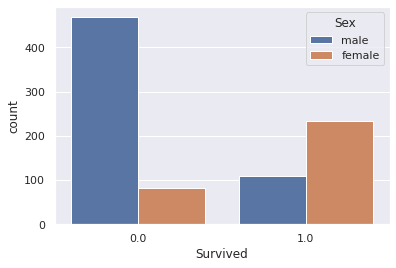

In [21]:
sns.countplot(x = 'Survived',hue = 'Sex' ,data = data)

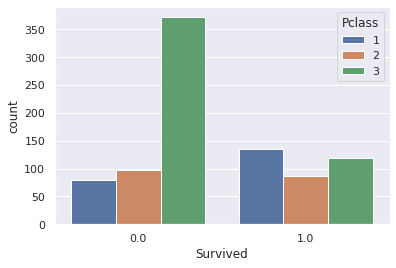

In [22]:
sns.countplot(x = 'Survived',hue = 'Pclass' ,data = data)

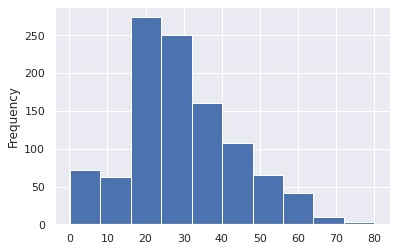

In [25]:
data['Age'].plot.hist()

## Data Preprocessing

In [33]:
data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
Class         5
dtype: int64

In [32]:
data.drop(["Hometown",
           "Age_wiki",
           "Name_wiki", 
           "Ticket",
           "Cabin",
           "Destination",
           "Body",
           "WikiId", 
           "Name","Boarded",
           "Lifeboat",
           "Name",
           "PassengerId"], axis= 1, inplace = True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class
0,0.0,3,male,22.0,1,0,7.2500,S,3.0
1,1.0,1,female,38.0,1,0,71.2833,C,1.0
2,1.0,3,female,26.0,0,0,7.9250,S,3.0
3,1.0,1,female,35.0,1,0,53.1000,S,1.0
4,0.0,3,male,35.0,0,0,8.0500,S,3.0
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,8.0500,S,3.0
1305,NaN,1,female,39.0,0,0,108.9000,C,1.0
1306,NaN,3,male,38.5,0,0,7.2500,S,3.0
1307,NaN,3,male,NaN,0,0,8.0500,S,3.0


## Handling Numerical Data

In [63]:
numerical_data = data[['Survived','Age','Fare']]
num_filled_knn = pd.DataFrame()
for column in numerical_data.columns:
    temp_array = KNN(k=3).fit_transform(numerical_data[column].values.reshape(-1,1))    
    num_filled_knn[column] = temp_array.ravel()
num_filled_knn.isnull().sum()

Imputing row 1/1309 with 0 missing, elapsed time: 0.111
Imputing row 101/1309 with 0 missing, elapsed time: 0.112
Imputing row 201/1309 with 0 missing, elapsed time: 0.112
Imputing row 301/1309 with 0 missing, elapsed time: 0.112
Imputing row 401/1309 with 0 missing, elapsed time: 0.112
Imputing row 501/1309 with 0 missing, elapsed time: 0.113
Imputing row 601/1309 with 0 missing, elapsed time: 0.113
Imputing row 701/1309 with 0 missing, elapsed time: 0.113
Imputing row 801/1309 with 0 missing, elapsed time: 0.114
Imputing row 901/1309 with 1 missing, elapsed time: 0.114
Imputing row 1001/1309 with 1 missing, elapsed time: 0.115
Imputing row 1101/1309 with 1 missing, elapsed time: 0.117
Imputing row 1201/1309 with 1 missing, elapsed time: 0.118
Imputing row 1301/1309 with 1 missing, elapsed time: 0.119
[KNN] Warning: 418/1309 still missing after imputation, replacing with 0
Imputing row 1/1309 with 0 missing, elapsed time: 0.165
Imputing row 101/1309 with 0 missing, elapsed time: 0.166

Survived    0
Age         0
Fare        0
dtype: int64

## Handling Categorical Data

In [67]:
categorical_data = data[['Fare','Embarked','Class']]
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_filled_knn = pd.DataFrame()
for column in categorical_data.columns:
     temp_array = imp_mean.fit_transform(categorical_data[column].values.reshape(-1,1))
     cat_filled_knn[column] = temp_array.ravel()
cat_filled_knn.isnull().sum()



Fare        0
Embarked    0
Class       0
dtype: int64

In [69]:
data[['Fare','Embarked','Class']] = cat_filled_knn
data[['Survived','Age','Fare']] = num_filled_knn
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Class       0
dtype: int64

In [70]:
sex = pd.get_dummies(data["Sex"], drop_first=True)
embark = pd.get_dummies(data["Embarked"], drop_first=True)
clss = pd.get_dummies(data["Class"], drop_first=True)
data.drop('Pclass', axis=1,inplace=True)
data=pd.concat([data,sex,embark,clss], axis=1)
data

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Class,male,Q,S,2.0,3.0
0,0.0,male,22.0,1,0,7.2500,S,3.0,1,0,1,0,1
1,1.0,female,38.0,1,0,71.2833,C,1.0,0,0,0,0,0
2,1.0,female,26.0,0,0,7.9250,S,3.0,0,0,1,0,1
3,1.0,female,35.0,1,0,53.1000,S,1.0,0,0,1,0,0
4,0.0,male,35.0,0,0,8.0500,S,3.0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,male,0.0,0,0,8.0500,S,3.0,1,0,1,0,1
1305,0.0,female,39.0,0,0,108.9000,C,1.0,0,0,0,0,0
1306,0.0,male,38.5,0,0,7.2500,S,3.0,1,0,1,0,1
1307,0.0,male,0.0,0,0,8.0500,S,3.0,1,0,1,0,1


In [71]:
data.drop(["Sex","Embarked",'Class'],axis=1,inplace=True) 

In [72]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2.0,3.0
0,0.0,22.0,1,0,7.2500,1,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1,0,1
3,1.0,35.0,1,0,53.1000,0,0,1,0,0
4,0.0,35.0,0,0,8.0500,1,0,1,0,1


In [76]:
features = data.drop('Survived',axis = 1)
target = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.3)


## Model Selection

In [88]:
logistic = LogisticRegression(max_iter=90000)

penalty = ['l2']

C = np.logspace(0, 10, 10)

hyperparameters = dict(C=C, penalty=penalty)

gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

best_model = gridsearch.fit(X_train, y_train)

In [89]:
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best C: 12.91549665014884


In [90]:
y_predicted = best_model.predict(X_test)

In [91]:
accuracy_score(y_test,y_predicted)

0.7989821882951654

In [96]:
clf = DecisionTreeClassifier(random_state=0)

max_depth = [2,3,4,5,6,7]

hyperparameters = dict(max_depth = max_depth)

gridsearch = GridSearchCV(clf, hyperparameters, cv=5, verbose=0)

best_model = gridsearch.fit(X_train, y_train)

In [97]:
print('Best depth:', best_model.best_estimator_.get_params()['max_depth'])

Best depth: 2


In [98]:
y_predicted = best_model.predict(X_test)

In [108]:
accuracy_score(y_test,y_predicted)

0.8040712468193384

## Model Evaluation

In [114]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

In [115]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

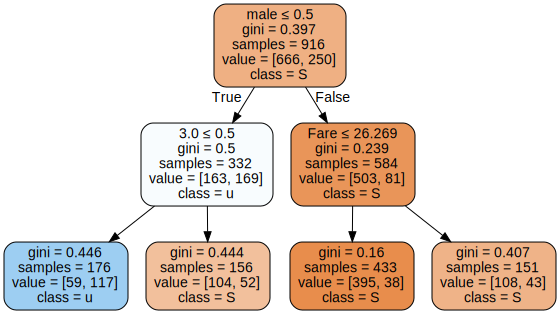

In [117]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=features.columns,  
                      class_names='Survived',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Classification Report

In [120]:
report = classification_report(y_test,y_predicted)

In [122]:
print(report)

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       301
         1.0       0.60      0.48      0.53        92

    accuracy                           0.80       393
   macro avg       0.73      0.69      0.70       393
weighted avg       0.79      0.80      0.80       393

